In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train = pd.read_csv('./input/train.csv', index_col='PassengerId')
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# DataFrame の情報を取得
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
train.describe()

# 列ごとの NaN データの数がわかる
# train.isnull().sum()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
# describe() の引数に include='型名' を指定することで数値型以外の統計量を計算可能
# 'O'(zeroじゃなくてオー)を指定するとobject型に適応できる
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"West, Mrs. Edwy Arthur (Ada Mary Worth)",male,1601,G6,S
freq,1,577,7,4,644


In [31]:
# groupby() データごとにまとめて操作を行う
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()\
                             .sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [32]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()\
                          .sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [33]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean()\
                            .sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [34]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean()\
                            .sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11182ccf8>,
      dtype=object)

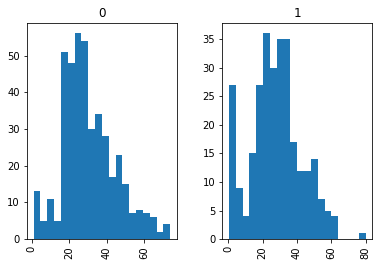

In [44]:
train['Age'].hist(by=train['Survived'], bins=20)

# Handle the data

In [50]:
# 不要なデータの削除
train.drop(['PassengerId', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [53]:
# 欠損データの補完
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)  # .mode()[0]: 最頻値のラベル
train['Fare'].fillna(train['Fare'].median(), inplace=True)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


In [63]:
# 新たなデータの追加
# 家族情報の追加
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

# 一人かどうかを追加
# dataset['IsAlone'] = 1
# dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0

# 敬称 (Mr, Mrs, Miss) を抽出
# expand=True: 複数の列に分割
train['Title'] = train['Name'].str.split(", ", expand=True)[1]\
                              .str.split(".", expand=True)[0]

# qcut, cut: ビン分割処理
# qcut: 各ビンに含まれる要素数が等しくなるようにビン分割する
# cut: 最小値と最大値の間を指定した値で等間隔に分割してビン分けし、どこに属するかが出力される
train['FareBin'] = pd.qcut(train['Fare'], 4)
train['AgeBin'] = pd.cut(train['Age'].astype(int), 5)  # .astype() で型変換

    
# あまり出てこない敬称の削除
print(train['Title'].value_counts())
stat_min = 10 #we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
title_names = (train['Title'].value_counts() < stat_min)

train['Title'] = train['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(train['Title'].value_counts())
print("-"*10)


#preview data again
train.info()
train.sample(3)

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Jonkheer          1
Sir               1
Don               1
the Countess      1
Mme               1
Lady              1
Ms                1
Capt              1
Name: Title, dtype: int64
Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
Title         891 non-null object
FareBin       891 non-null category
AgeBin        8

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,FareBin,AgeBin
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"
113,0,3,"Jussila, Miss. Katriina",female,20.0,1,0,9.8250,S,2,Miss,"(7.91, 14.454]","(16.0, 32.0]"
197,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,8.4042,S,2,Mr,"(7.91, 14.454]","(32.0, 48.0]"


# Prediction

In [64]:
# Import data modeling libraries
# Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

# Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [70]:
#CONVERT

#code categorical data
# sklearn.preprocessing.LabelEncoder(): ラベルを適当な数値へ変換するためのライブラリ
# fit() で変換則を導出, transform() で書き換え, fit_transform()は合わせ技
label = LabelEncoder()
train['Sex_Code'] = label.fit_transform(train['Sex'])
train['Embarked_Code'] = label.fit_transform(train['Embarked'])
train['Title_Code'] = label.fit_transform(train['Title'])
train['AgeBin_Code'] = label.fit_transform(train['AgeBin'])
train['FareBin_Code'] = label.fit_transform(train['FareBin'])

train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,2,3,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,0,4,2,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Miss,"(7.91, 14.454]","(16.0, 32.0]",0,2,2,1,1


In [79]:
#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize']
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation

#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']

#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(train[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()

data1_dummy.head(3)

,Pclass,SibSp,Parch,Age,Fare,FamilySize,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,0,0,0,1,0,0,1,0,0


In [93]:
# Validation 用にデータを分ける
# sklearn.models_selection.train_test_split(*arrays, **options): *options に基づいて *arrays を分割
# *arrays: 同じ長さを持った分割対象の複数のリスト
# random_state: シャッフルの乱数のタネ
train1_x, test1_x, train1_y, test1_y\
= model_selection.train_test_split(train[data1_x_calc], train[Target], random_state=0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin\
= model_selection.train_test_split(train[data1_x_bin], train[Target], random_state=0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy\
= model_selection.train_test_split(data1_dummy[data1_x_dummy], train[Target], random_state=0)

print("Data1 Shape: {}".format(train.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head(3)

Data1 Shape: (891, 18)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2


In [94]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data1[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

NameError: name 'data1' is not defined

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

In [ ]:
train_label = train['Survived']
train_features = train.drop('Survived', axis=1)  # axis=1: 列を削除